In [2]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data from the CSV file
data1 = pd.read_csv("socialinsider_events_2024-05.csv")
data2 = pd.read_csv("socialinsider_events_2024-06.csv")
data3 = pd.read_csv("socialinsider_events_2024-07.csv")
data4 = pd.read_csv("socialinsider_events_2024-08.csv")
data5 = pd.read_csv("socialinsider_events_2024-09.csv")

In [4]:
# Concatenate the data
data = pd.concat([data1, data2, data3, data4, data5])

# Sort the data by time_created
data = data.sort_values(by="time_created")

In [5]:
data

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4,i10e_new_project,5ec95a7548babd264a6572cbec3d2e92d47bc26945552a...,2024-09-17T15:40:02.040Z,trial,America/New_York,United States,projecthome,xch,NaN,NaN
3,profile visit,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:23.029Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN
2,profile load success,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.227Z,trial,Asia/Manila,Philippines,profile,fb,NaN,1.732
1,section change,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.836Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN


In [6]:
# Create a column that show whether the event is successful or not
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()
# 1 if the user is in buy_users, 0 otherwise
data["successful"] = data["user_id"].apply(lambda x: 1 if x in buy_users else 0)
data

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264,0
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN,0
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4,i10e_new_project,5ec95a7548babd264a6572cbec3d2e92d47bc26945552a...,2024-09-17T15:40:02.040Z,trial,America/New_York,United States,projecthome,xch,NaN,NaN,0
3,profile visit,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:23.029Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0
2,profile load success,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.227Z,trial,Asia/Manila,Philippines,profile,fb,NaN,1.732,0
1,section change,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.836Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0


In [7]:
# create the date that the event was created
data["Date_Created"] = pd.to_datetime(data["time_created"]).dt.date
# create the hour that the event was created
data["Hour_Created"] = pd.to_datetime(data["time_created"]).dt.hour
# create the day of the week that the event was created
data["Day_Of_Week_Created"] = pd.to_datetime(data["time_created"]).dt.day_name()

In [8]:
data.head()

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful,Date_Created,Hour_Created,Day_Of_Week_Created
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264,0,2024-04-30,20,Tuesday
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN,0,2024-04-30,21,Tuesday
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN,0,2024-04-30,21,Tuesday


In [9]:
data["Date_Created"].unique()

array([datetime.date(2024, 4, 30), datetime.date(2024, 5, 1),
       datetime.date(2024, 5, 2), datetime.date(2024, 5, 3),
       datetime.date(2024, 5, 4), datetime.date(2024, 5, 5),
       datetime.date(2024, 5, 6), datetime.date(2024, 5, 7),
       datetime.date(2024, 5, 8), datetime.date(2024, 5, 9),
       datetime.date(2024, 5, 10), datetime.date(2024, 5, 11),
       datetime.date(2024, 5, 12), datetime.date(2024, 5, 13),
       datetime.date(2024, 5, 14), datetime.date(2024, 5, 15),
       datetime.date(2024, 5, 16), datetime.date(2024, 5, 17),
       datetime.date(2024, 5, 18), datetime.date(2024, 5, 19),
       datetime.date(2024, 5, 20), datetime.date(2024, 5, 21),
       datetime.date(2024, 5, 22), datetime.date(2024, 5, 23),
       datetime.date(2024, 5, 24), datetime.date(2024, 5, 25),
       datetime.date(2024, 5, 26), datetime.date(2024, 5, 27),
       datetime.date(2024, 5, 28), datetime.date(2024, 5, 29),
       datetime.date(2024, 5, 30), datetime.date(2024, 5, 31),
 

### Missing Value

In [10]:
data.isnull().sum()

event_name               6326
user_id                     0
time_created                0
user_type                   0
time_zone               61506
country                107849
view                   340791
platform                61504
report_type            952686
load_time              830333
successful                  0
Date_Created                0
Hour_Created                0
Day_Of_Week_Created         0
dtype: int64

In [11]:
# calucate the percentage of missing values
data.isnull().sum() / len(data) * 100

event_name              0.651818
user_id                 0.000000
time_created            0.000000
user_type               0.000000
time_zone               6.337447
country                11.112531
view                   35.114377
platform                6.337241
report_type            98.162732
load_time              85.555740
successful              0.000000
Date_Created            0.000000
Hour_Created            0.000000
Day_Of_Week_Created     0.000000
dtype: float64

Drop `report type`, `load_time`

### Insights

#### Country

In [12]:
data["country"].value_counts()

country
India            140705
Indonesia         84093
United States     75962
Egypt             52495
Britain (UK)      43806
                  ...  
Liberia               8
Bahamas               5
Fiji                  2
Angola                2
Togo                  1
Name: count, Length: 143, dtype: int64

#### Timezone

In [13]:
data["time_zone"].value_counts()

time_zone
Asia/Calcutta        137619
Asia/Jakarta          82132
Africa/Cairo          52495
Europe/London         43806
Asia/Bangkok          37579
                      ...  
America/Matamoros         5
Pacific/Fiji              2
Africa/Luanda             2
Africa/Lome               1
America/Regina            1
Name: count, Length: 219, dtype: int64

### View

In [14]:
data["view"].value_counts()

view
profile        374510
benchmark       89610
projecthome     69399
postsfeed       28018
brands          25806
campaigns       21622
reports          6934
upgradeplan      6200
hashtag          4818
settings         1887
bench             282
add               280
proj              129
ads                98
addprofiles        76
search             38
connect            18
page                1
Name: count, dtype: int64

In [15]:
# count the data by view and event_name
view_data = data.groupby(["view", "event_name"]).size().unstack(fill_value=0)
view_data

event_name,upgrade_plan,add profile success,autoreports click,book a demo,brand click,brand load success,connect click,connect fb success,connect social accounts sidebar,connect success,...,edit autoreport click,reports_history_add_autoreports,reports_history_copy_link,reports_history_download,save autoreport changes click,save autoreport changes success,save autoreport click,schedule autoreport click,Invoices section click,Manage section click
view,,,,,,,,,,,,,,,,,,,,,
add,280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addprofiles,76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ads,1,5,3,1,2,4,2,3,4,3,...,0,0,0,0,0,0,0,0,0,0
bench,9,0,0,0,0,0,3,0,6,1,...,0,0,0,0,0,0,0,0,0,0
benchmark,261,26,434,19,193,33,13,0,46,1,...,0,0,0,0,0,0,0,0,0,0
brands,103,1,68,10,1336,9039,3,0,25,0,...,0,0,0,0,0,0,0,0,0,0
campaigns,47,3,1608,8,57,9,1,0,10,0,...,0,0,0,0,0,0,0,0,0,0
connect,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hashtag,15,0,0,0,0,0,5,4,15,2,...,0,0,0,0,0,0,0,0,0,0


### Create Buy Success Event and Unsuccessful Event

In [16]:
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()
buy_users_events = data[data["user_id"].isin(buy_users)]
# create a dataset with only the unsuccessful events
not_buy_users_events = data[data["successful"] == 0]

In [17]:
buy_not_buy = {
    "buy_users_events": buy_users_events,
    "not_buy_users_events": not_buy_users_events,
}

In [18]:
for i in buy_not_buy:
    print(i, buy_not_buy[i]["event_name"].value_counts().sort_values(ascending=False))

buy_users_events event_name
section change                      599
bench load success                  590
profile search click                560
profile search success              538
add profile click                   477
                                   ... 
create campaign manual click          1
signup fail                           1
save autoreport changes success       1
edit autoreport click                 1
suggested campaign details click      1
Name: count, Length: 130, dtype: int64
not_buy_users_events event_name
section change            112540
profile visit              79743
profile load success       53888
profile search click       48612
profile search success     47073
                           ...  
rename failed                  1
reset logo click               1
connect tw success             1
connect tk success             1
reset logo success             1
Name: count, Length: 176, dtype: int64


### View in buy success event

In [19]:
# calculate the percentage of views in both successful and not successful events
print(
    "buy success event",
    buy_users_events["view"].value_counts() / len(buy_users_events) * 100,
)
print(
    "not buy success event",
    not_buy_users_events["view"].value_counts() / len(not_buy_users_events) * 100,
)

buy success event view
profile        20.923334
benchmark      20.617410
projecthome    10.559006
brands          6.044313
postsfeed       2.197089
campaigns       1.538889
settings        1.075368
upgradeplan     0.862149
reports         0.723093
ads             0.157597
add             0.120515
hashtag         0.111245
addprofiles     0.055623
proj            0.018541
bench           0.018541
connect         0.009270
Name: count, dtype: float64
not buy success event view
profile        38.787263
benchmark       9.105269
projecthome     7.112417
postsfeed       2.894668
brands          2.620945
campaigns       2.235629
reports         0.714368
upgradeplan     0.636325
hashtag         0.500766
settings        0.184531
bench           0.029175
add             0.027820
proj            0.013233
ads             0.008440
addprofiles     0.007294
search          0.003959
connect         0.001771
page            0.000104
Name: count, dtype: float64


# User Data Transformation

In [20]:
data["user_id"].nunique()

10608

In [21]:
user_data = (
    data.groupby("user_id")
    .agg(
        {
            "event_name": "count",  # Count events
            "country": "first",  # Take the first occurrence of country (assuming it's the same for each user)
        }
    )
    .reset_index()
    .rename(columns={"event_name": "count"})  # Rename for clarity
    .sort_values(by="count", ascending=False)  # Sort by event_count
)

In [22]:
# Add the column to show whether the user is successful or not
user_data["successful"] = user_data["user_id"].apply(
    lambda x: 1 if x in buy_users else 0
)
user_data

,user_id,count,country,successful
8543,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0
3713,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0
4081,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0
10483,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0
3857,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0
...,...,...,...,...
5897,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0
10147,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0
10467,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0
1822,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0


In [23]:
data["successful"].value_counts()

successful
0    959730
1     10787
Name: count, dtype: int64

In [24]:
long_users = user_data[user_data["count"] >= 2000]["user_id"].tolist()
long_users

['cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d40a4ff840ae10847ae',
 '5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b149ce8dcdceb36105877',
 '622748abdc404cbf098568074c232b04762d574fa48130c2faa70ed2045c0b9f',
 'fd15147418cba03da1908de36ac79bc24589c9d147471627be469420403fa618',
 '5c54eb7d3e4821d8e633e7ef23dacafe3f5a653071551069aa8533f6957328e3',
 'e2c4dcb35138bd1554a225848563f1b9a5892936f6c7036b697ff284268aa308',
 '5ad213668100d54a5979a7dc0eb398cd91036afec7ec1ed50eff63fd6e81a957']

In [25]:
# filter the data to only include the long users
long_users_data = data[data["user_id"].isin(long_users)]
long_users_data["event_name"].value_counts()

event_name
profile visit                 12322
profile load fail              6872
profile load pending           5236
posts section visit             373
posts section load success      363
                              ...  
brand remove click                1
brand remove success              1
yt bench click                    1
Details section click             1
home brand click                  1
Name: count, Length: 116, dtype: int64

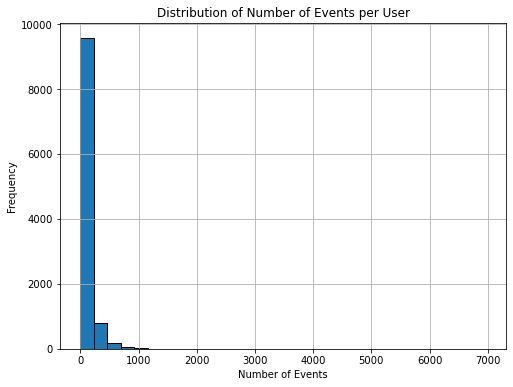

In [26]:
# Create a histogram of the number of events each user has
plt.figure(figsize=(8, 6))
plt.hist(user_data["count"], bins=30, edgecolor="black")
plt.title("Distribution of Number of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Country Data

In [27]:
# Group by country to calculate overall conversion rates
country_conversion = (
    user_data.groupby("country")
    .agg(
        total_users=("user_id", "count"),  # Count unique users
        total_success=("successful", "sum"),  # Total successes across users
    )
    .reset_index()
)

# Calculate conversion rate
country_conversion["conversion_rate"] = (
    country_conversion["total_success"] / country_conversion["total_users"]
)
country_conversion = country_conversion.sort_values(by="total_success", ascending=False)

# Display the result
country_conversion

,country,total_users,total_success,conversion_rate
135,United States,844,16,0.018957
112,Saudi Arabia,192,6,0.031250
58,India,1720,5,0.002907
17,Britain (UK),438,4,0.009132
64,Italy,218,3,0.013761
...,...,...,...,...
43,Fiji,1,0,0.000000
42,Ethiopia,9,0,0.000000
41,Estonia,5,0,0.000000
40,El Salvador,6,0,0.000000


In [28]:
country_conversion[country_conversion["total_success"] >= 1]

,country,total_users,total_success,conversion_rate
135,United States,844,16,0.018957
112,Saudi Arabia,192,6,0.031250
58,India,1720,5,0.002907
17,Britain (UK),438,4,0.009132
64,Italy,218,3,0.013761
4,Australia,125,2,0.016000
59,Indonesia,881,2,0.002270
120,Spain,123,2,0.016260
49,Germany,152,2,0.013158
62,Ireland,27,2,0.074074


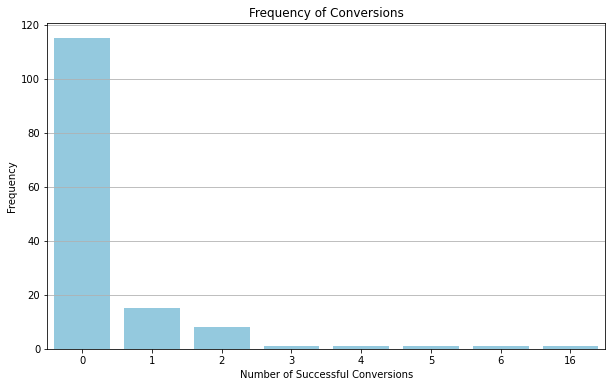

In [29]:
# Create a new DataFrame for conversion frequency
conversion_frequency = (
    country_conversion.groupby("total_success").size().reset_index(name="frequency")
)

# Plotting the frequency of conversions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conversion_frequency, x="total_success", y="frequency", color="skyblue"
)
plt.title("Frequency of Conversions")
plt.xlabel("Number of Successful Conversions")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

In [30]:
# Success rate
success_rate = user_data["successful"].sum() / user_data["successful"].count()
print(f"Success rate: {success_rate}")

Success rate: 0.009709653092006033


## MORE EDA

In [44]:
# print successful and total users at each platform
print(
    "Successful Users:",
    data[data["successful"] == 1]["user_id"].nunique(),
)

Successful Users: 103


In [45]:
# Group by country to calculate overall conversion rates
country_conversion = (
    user_data.groupby("country")
    .agg(
        total_users=("user_id", "count"),  # Count unique users
        total_success=("successful", "sum"),  # Total successes across users
    )
    .reset_index()
)

# Calculate conversion rate
country_conversion["conversion_rate"] = (
    country_conversion["total_success"] / country_conversion["total_users"]
)
country_conversion = country_conversion.sort_values(by="total_success", ascending=False)

# Display the result
country_conversion

Total Users: 10608


In [48]:
# platform conversion rate
platform_conversion = (
    data.groupby("platform")
    .agg(
        total_users=("user_id", "count"),  # Count users
        total_success=("successful", "sum"),  # Total successes across users
        conversion=("successful", "mean"),  # Conversion rate
    )
    .reset_index()
)
platform_conversion

,platform,total_users,total_success,conversion
0,all,208,0,0.000000
1,brbench,4953,214,0.043206
2,cross-platform,5156,105,0.020365
3,facebook,1498,6,0.004005
4,fb,135264,1333,0.009855
5,hashtags,47,0,0.000000
6,ig,213936,1364,0.006376
7,instagram,2991,14,0.004681
8,li,51138,586,0.011459
9,linkedin,773,8,0.010349


## Transform Platform data

In [109]:
# new dataframe : platform, events, user_ids, successful
platform_data = (
    data.groupby("platform")
    .agg(
        events=("event_name", "count"),  # Count events
        user_ids=("user_id", "nunique"),  # Count unique users
        successful=("successful", "sum"),  # Total successes
        # event names
        event_names=("event_name", lambda x: ", ".join(x.unique())),
    )
    .reset_index()
)
platform_data

,platform,events,user_ids,successful,event_names
0,all,208,147,0,connect all success
1,brbench,4953,683,214,"brbench bench click, bench visit, bench load s..."
2,cross-platform,5156,806,105,xch benchmark - loaded
3,facebook,1498,770,6,"compare, posts pagination click"
4,fb,135264,3590,1333,"add profile click, add profile success, profil..."
5,hashtags,47,22,0,posts pagination click
6,ig,213936,4743,1364,"profile load success, section change, profile ..."
7,instagram,2991,1414,14,compare
8,li,51138,1583,586,"add profile click, add profile success, profil..."
9,linkedin,773,335,8,compare


In [110]:
# combine platforms: youtube annd yt to youtube
platform_data["platform"] = platform_data["platform"].replace("yt", "youtube")
# combine platforms: tiktok and tk to tiktok
platform_data["platform"] = platform_data["platform"].replace("tk", "tiktok")
# combine platforms: tw and twitter to twitter
platform_data["platform"] = platform_data["platform"].replace("tw", "twitter")
# combine platforms: fb, facebook and showFacebook to meta
platform_data["platform"] = platform_data["platform"].replace("fb", "meta")
platform_data["platform"] = platform_data["platform"].replace("facebook", "meta")
platform_data["platform"] = platform_data["platform"].replace("showFacebook", "meta")
# combine platforms: ig and instagram to instagram
platform_data["platform"] = platform_data["platform"].replace("ig", "instagram")
# combine platforms: li and linkedin to linkedin
platform_data["platform"] = platform_data["platform"].replace("li", "linkedin")
# combine same platforms
platform_data = platform_data.groupby("platform").sum().reset_index()
platform_data

,platform,events,user_ids,successful,event_names
0,all,208,147,0,connect all success
1,brbench,4953,683,214,"brbench bench click, bench visit, bench load s..."
2,cross-platform,5156,806,105,xch benchmark - loaded
3,hashtags,47,22,0,posts pagination click
4,instagram,216927,6157,1378,"profile load success, section change, profile ..."
5,linkedin,51911,1918,594,"add profile click, add profile success, profil..."
6,meta,138149,5138,1357,"compare, posts pagination clickadd profile cli..."
7,tiktok,71565,2551,1001,"compareprofile visit, section change, profile ..."
8,twitter,41797,1874,596,"profile visit, profile load success, section c..."
9,xch,348857,10487,4605,"project home visit, delete_trial_request, sign..."


In [111]:
# platform conversion rate at unique users
platform_data["conversion_rate"] = platform_data["successful"] / platform_data["user_ids"]
platform_data

,platform,events,user_ids,successful,event_names,conversion_rate
0,all,208,147,0,connect all success,0.000000
1,brbench,4953,683,214,"brbench bench click, bench visit, bench load s...",0.313324
2,cross-platform,5156,806,105,xch benchmark - loaded,0.130273
3,hashtags,47,22,0,posts pagination click,0.000000
4,instagram,216927,6157,1378,"profile load success, section change, profile ...",0.223810
5,linkedin,51911,1918,594,"add profile click, add profile success, profil...",0.309698
6,meta,138149,5138,1357,"compare, posts pagination clickadd profile cli...",0.264111
7,tiktok,71565,2551,1001,"compareprofile visit, section change, profile ...",0.392395
8,twitter,41797,1874,596,"profile visit, profile load success, section c...",0.318036
9,xch,348857,10487,4605,"project home visit, delete_trial_request, sign...",0.439115


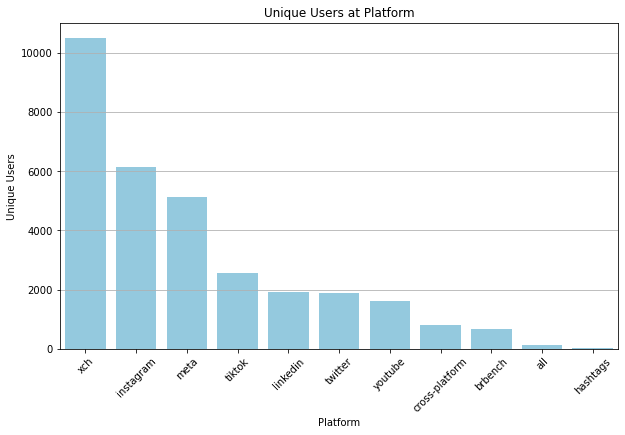

In [92]:
# visualize unique users at platform (sorted by unique users frequency)
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_data.sort_values(by="user_ids", ascending=False), x="platform", y="user_ids", color="skyblue")
plt.title("Unique Users at Platform")
plt.xlabel("Platform")
plt.ylabel("Unique Users")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

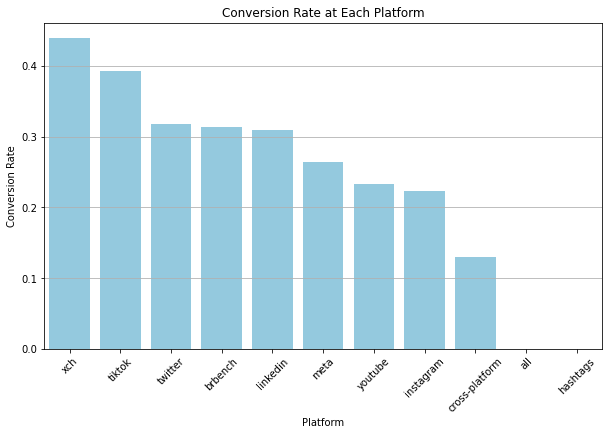

In [94]:
# visualize conversion rate at platform (sorted by conversion rate)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_data.sort_values(by="conversion_rate", ascending=False),
    x="platform",
    y="conversion_rate",
    color="skyblue",
)
plt.title("Conversion Rate at Each Platform")
plt.xlabel("Platform")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

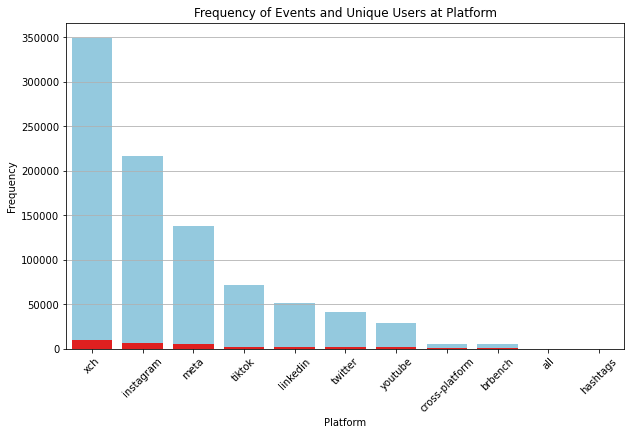

In [97]:
# print frequency of events at each platform as well as unique users on the same graph(sorted by frequency)
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_data.sort_values(by="events", ascending=False), x="platform", y="events", color="skyblue")
sns.barplot(data=platform_data.sort_values(by="user_ids", ascending=False), x="platform", y="user_ids", color="red")
plt.title("Frequency of Events and Unique Users at Platform")
plt.xlabel("Platform")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [104]:
# print the most frequent events at each platform (sorted from most frequent to least frequent)
platform_data["event_names"] = platform_data["event_names"].apply(lambda x: x.split(", "))
platform_data = platform_data.explode("event_names")
platform_data = platform_data.groupby(["platform", "event_names"]).size().unstack(fill_value=0)
platform_data

event_names,Campaigns Dropdown Click,Details section click,Dropdown Campaign Selected,Integrations section click,Invoices section click,Manage section click,ProfilesSwaps section click,add profile click,add profile success,add social profile benchmarks,...,tw bench click,unfocus brand click,unfocus brand success,upgrade_plan,upload logo click,upload logo success,view suggested campaign click,xch bench click,xch benchmark - loaded,yt bench click
platform,,,,,,,,,,,,,,,,,,,,,
all,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brbench,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
cross-platform,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
facebook,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fb,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
hashtags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ig,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
instagram,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
li,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [106]:
# print all event name at youtube
youtube_data = data[data["platform"] == "youtube"]
youtube_data["event_name"].value_counts()

event_name
compare    296
Name: count, dtype: int64

In [77]:
# print events at youtube
# platform_event[platform_event["platform"] == "youtube"]
# print total events at youtube
youtube_events = data[data["platform"] == "youtube"]["event_name"].value_counts()
print("youtube events:")
youtube_events

youtube events:


event_name
compare    296
Name: count, dtype: int64